#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

In [3]:
print(X.shape)
print(y.shape)
print(X[0:5, 0])
print(y[0:5])
X[0:5, 0][y[0:5]==0]

(100, 2)
(100,)
[1.89098263 4.34848886 5.85004388 4.12072221 4.67663967]
[0 1 1 1 1]


array([1.89098263])

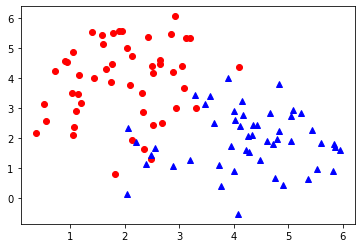

In [4]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.show()


Error, shape of x ((2, 100)) is invalid!!
Iteration: 0, Cost: 0.24987827249597835
No of samples: (1, 100)
Iteration: 1, Cost: 0.24987717084521185
No of samples: (1, 100)
Iteration: 2, Cost: 0.24987604820608852
No of samples: (1, 100)
Iteration: 3, Cost: 0.24987490396308776
No of samples: (1, 100)
Iteration: 4, Cost: 0.24987373747617314
No of samples: (1, 100)
Iteration: 5, Cost: 0.24987254807955178
No of samples: (1, 100)
Iteration: 6, Cost: 0.24987133508035939
No of samples: (1, 100)
Iteration: 7, Cost: 0.2498700977572625
No of samples: (1, 100)
Iteration: 8, Cost: 0.24986883535897328
No of samples: (1, 100)
Iteration: 9, Cost: 0.24986754710266978
No of samples: (1, 100)
Iteration: 10, Cost: 0.2498662321723152
No of samples: (1, 100)
Iteration: 11, Cost: 0.24986488971686782
No of samples: (1, 100)
Iteration: 12, Cost: 0.24986351884837316
No of samples: (1, 100)
Iteration: 13, Cost: 0.24986211863993063
No of samples: (1, 100)
Iteration: 14, Cost: 0.2498606881235223
No of samples: (1, 1

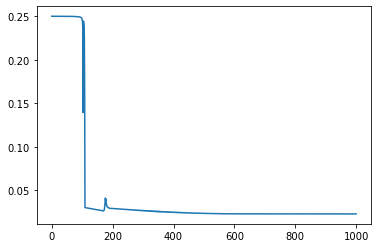

Average_cost: 0.022883803554554785


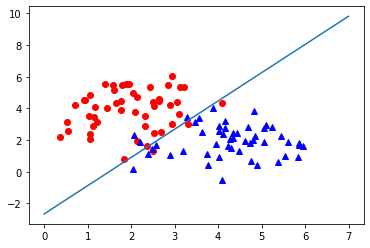

In [5]:
'''Logistic regression:
Input Data: X - 2D Data - [x1, x2]
    Feature vector dimensions: X_features - 3D - [1, x1, x2]
Weight vector/matrix: w - 3D
    w = [w0, w1, w2]
Hypothesis function: Logistic/Sigmoid function
    h_w(x) = 1/(1+exp(-w.T @ x))
        h_w(x) >= 0.5, then y_pred = 1
        h_w(x) < 0.5,  then y_pred = 0
Loss function: 
    1. Negitive log likelihood function
        L(w) = -y*log( h_w(x) ) - (1-y)*log( 1 - h_w(x) )
    2. Mean Squared error:
        L(w) = (1/2) * (h_w(x) - y)**2
        To be minimized
Optimizer: Gradient Descent Algorithm
    w(i+1) = w(i) - (learning_rate)*gradient_w(h_w(x))
Partial derivatives:
    w.r.t dw0: (h_w(x) - y) * h_w(x)*(1-h_w(x))
    w.r.t dw1: (h_w(x) - y) * x1 * h_w(x)*(1-h_w(x))
    w.r.t dw0: (h_w(x) - y) * x2 * h_w(x)*(1-h_w(x))
    i.e. dw = (h_w(x) - y) * x * h_w(x)*(1-h_w(x))
Decision Boundary: 
    w.T @ x = 0
'''
class LogisticRegression:
    def __init__(self, no_of_features_without_1, learning_rate):
        '''
        No of features = 2 for 2D data. Do not count 1 as a feature while sending it as 
        an arguement 
        '''
        self.no_of_features_without_1 = no_of_features_without_1
        self.no_of_features = no_of_features_without_1 + 1
        # Random non-zero initialization of weight matrix
        self.w = np.random.uniform(low=1.0, high=2.0, size=no_of_features_without_1+1)
        self.w = self.w.T[:, np.newaxis] # w must be a column vector
        self.learning_rate = learning_rate # learning rate 

    def convert_data_to_feature_vector(self, x):
        '''
        Given x (no_of_features * no_of_samples), convert it into - (no_of_features+1)*(no_of_samples)
        i.e. x_old = [[x1],
                      [x2]]
        then, x_new = [[1],
                       [x1],
                       [x2]]
        '''
        if len(x) == self.no_of_features:
            return x
        elif len(x) == self.no_of_features - 1:
            return np.vstack((np.ones(shape=(1, x.shape[1])), x))
        else:
            print("Dimensions of X mismatched, please check!!! Each column is a sample, hence rows should contain features")
            exit()

    def h(self, x):
        '''
        Hypothesis function: h_w(x) = 1/(1+exp(-w.T@x))
        x = no_of_features * 1 vector (or) no_of_features * n matrix (where n = no of samples)
        x - np.ndarray
        Output: 
        '''
        if len(x) < self.no_of_features:
            x = np.vstack((np.ones(shape=(1, x.shape[1])), x))
        # print("Shapes of W and x: {} and {}".format(self.w.shape, x.shape))
        y_pred = 1/(1+np.exp(-1 * self.w.T @ x))
        y_pred = (y_pred.flatten())[np.newaxis, :]
        # print("Shape of h(x) is {}".format(y_pred.shape))
        return y_pred

    def entropy_cost_from_preds(self, y_predicted, y):
        '''
        Metadata
        y_predicted: Predicted values
        y: Ground truth
        Input: y_predicted - (int) or (1D np.array), y - (int) or (1D np.array)
        Output: Mean total cost - (int)
        '''
        cost = -1  *  (y*(np.log(y_predicted)) + (1-y)*np.log(1-y_predicted))
        cost = cost.flatten() # np.flatten(cost)
        return (1/self.no_of_features) * np.sum(cost)

    def entropy_cost_from_x(self, x, y):
        if len(x) == self.no_of_features_without_1:
            x = np.vstack((np.ones(shape=(1, x.shape[1])), x))
        y_predicted = self.h(x)
        return self.entropy_cost_from_preds(y_predicted, y)

    def l2_cost_from_preds(self, y_predicted, y):
        '''
        Returns half of mean squared error 
        error = (1/2)* (norm(y - h_w(x))**2)
        '''
        y1 = y.flatten() # np.flatten(y)
        y2 = y_predicted.flatten() # np.flatten(y_predicted)
        cost = np.mean((y2 - y1)**2) / 2
        return cost
    
    def l2_cost_from_x(self, x, y):
        if len(x) == self.no_of_features_without_1:
            x = np.vstack((np.ones(shape=(1, x.shape[1])), x))
        y_predicted = self.h(x)
        return self.l2_cost_from_preds(y_predicted, y)
        

    def l2_gradient(self, x, y):
        '''
        Dimensions of x: no_of_features * no_of_samples
        Calculates the gradient for l2_cost
        '''
        y_pred = self.h(x)
        no_of_samples = len(y_pred)
        print("No of samples: {}".format(y_pred.shape))
        dw = (np.sum(2 * (y_pred - y) * self.h(x) * (1-y_pred) * x, axis=1, keepdims=True))/no_of_samples
        # print("Gradient: {}".format(dw))
        return dw        

    def gradient_descent(self, x, y):
        '''
        Gradient descent algorithm on l2 loss using l2_gradient
        w = w - learning_rate*(l2_gradient(y_pred, y))
        Vectorized! Zoom Zoom!
        '''
        # Update weights
        self.w = self.w - self.learning_rate*self.l2_gradient(x, y)
        
    def train(self, x, y, iterations):
        '''
        Numpy arrays - x and y
        Input: x: (no_of_features * no_of_samples)
               y: (1*no_of_samples)
               iterations: (int)
        '''
        if len(x) == self.no_of_features_without_1:
            x_modified = self.convert_data_to_feature_vector(x)
        # Check shapes of x and y
        if len(x) != self.no_of_features:
            print("Error, shape of x ({}) is invalid!!".format(x.shape))
            exit()
        if y.shape[0] != 1:
            print("Error, shape of y ({}) is invalid".format(y.shape))
        if x.shape[1] != y.shape[1]:
            print("Error, x ({}) and y ({}) don't have same no of columns (no of samples)".format(x.shape, y.shape))
        collected_costs = []
        # Start the training loop
        for i in range(iterations):
            # 1. Predict y
            y_pred = self.h(x_modified)
            # 2. Calculate mean squared error loss
            cost = self.l2_cost_from_preds(y_pred, y)
            collected_costs.append(cost)
            print("\rIteration: {}, Cost: {}".format(i, cost))
            # 3. Perform gradient descent i.e. Update weights
            self.gradient_descent(x_modified, y)
        
        # Final cost
        collected_costs.append(self.l2_cost_from_x(x_modified, y))
        # Finally plot the iteration vs cost graph
        fig = plt.figure()
        plt.plot(np.arange(iterations+1), collected_costs)
        plt.show()

    def test(self, x, y):
        '''
        Input: x: (no_of_features, no_of_samples) (or) (no_of_features_without_1, no_of_samples)
               y: (1, no_of_samples)
        '''
        x_modified = 1 * x
        if len(x) == self.no_of_features_without_1:
            x_modified = self.convert_data_to_feature_vector(x)
        # Check shapes of x and y
        if len(x_modified) != self.no_of_features:
            print("Error, shape of x ({}) is invalid!!".format(x_modified.shape))
            exit()
        if y.shape[0] != 1:
            print("Error, shape of y ({}) is invalid".format(y.shape))
        if x_modified.shape[1] != y.shape[1]:
            print("Error, x ({}) and y ({}) don't have same no of columns (no of samples)".format(x_modified.shape, y.shape))
       
        y_pred = self.h(x)
        # Average mean squared loss
        cost = self.l2_cost_from_preds(y_pred, y)
        print("Average_cost: {}".format(cost))
        # Accuracy and F1 score: TBD
        return cost

    def plot_decision_boundary(self, X, Y):
        # Creating vectors X and Y representing the line
        if self.w[2] != 0:
            x = np.linspace(0, 7, 100)
            y = -1 * (self.w[0] + self.w[1]*x) / (self.w[2])
        elif self.w[1] != 0:
            y = np.linspace(0, 7, 100)
            x = -1 * (self.w[0] + self.w[2]*y) / (self.w[1])
        
        fig = plt.figure()
        # Create the plot
        plt.plot(X[:,0][Y==0],X[:,1][Y==0],'o',color='red') # data from class 0
        plt.plot(X[:,0][Y==1],X[:,1][Y==1],'^',color='blue') # data from class 1
        plt.plot(x, y) # decision boundary
        
        # Show the plot
        plt.show()

# Data has been already generated in the previous cell - please run all the cells
# X - input data - shape - (no_of_samples, no_of_features_without_1)
# y - labels (ground truth) - (no_of_samples, 1)

# Reshape X and y to 
# X: (no_of_features_without_1, no_of_samples) 
# y: (1, no_of_samples)
X_modified = X.T
y_modified = y.T
y_modified = y[np.newaxis, :]

no_of_features_without_1 = X_modified.shape[0]
learning_rate = 0.06
log_reg = LogisticRegression(no_of_features_without_1, learning_rate)

iterations = 1000
log_reg.train(x=X_modified, y=y_modified, iterations=iterations)

log_reg.test(X_modified, y_modified)

log_reg.plot_decision_boundary(X, y)